Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [1]:
NAME = "Maris Galesloot"
STUDENT_NUMBER = "s4634098"
COLLABORATOR_NAME = "Kamiel Kunst"
COLLABORATOR_STUDENT_NUMBER = "s1037679"

---

# Assignment 6: Nearest Neighbour and Artificial Neural Networks

## Objective of this assignment
The objective of this exercise is to understand how k-nearest neighbor and neural networks can be used to solve classification problems.

## ** Important: ** When handing in your homework:
+ Hand in the notebook (and nothing else) named as follows: StudentName1_snumber_StudentName2_snumber.ipynb
+ Provide clear and complete answers to the questions below under a separate header (not hidden somewhere in your source code), and make sure to explain your answers / motivate your choices. Add Markdown cells where necessary.
+ Source code, output graphs, derivations, etc., should be included in the notebook.
+ Hand-in: upload to Brightspace.
+ Include name, student number, assignment (especially in filenames)!
+ When working in pairs only one of you should upload the assignment, and report the name of your partner in your filename.
+ For problems or questions: come to the practical sessions or email the student assistants.


## Advised Reading and Exercise Material
**The following reading material is recommended:**

- Pang-Ning Tan, Michael Steinbach, and Vipin Kumar, *Introduction to Data Mining*, section 5.2-5.4.


## Additional Tools
This exercise is based upon material kindly provided by the Cognitive System Section, DTU Compute, http://cogsys.compute.dtu.dk. Any sale or commercial distribution is strictly forbidden.


##  6.1 K-nearest neighbor classification
In this exercise we will use the k-nearest neighbors (KNN) method for classification.
First, we will consider the four synthetic data sets synth1, synth2, synth3 and
synth4 we used in earlier assignments.

#### 6.1.1 (2 points)
For each of the four synthetic data sets, do the following.:

* Load the training part of the dataset `X_train` and `y_train` as well as `X_test` and `y_test`.

* Fit a  k-nearest neighbor classifier model (`KNeighborsClassifier` from `sklearn.neighbors` (http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)) on the train data. 
  * Choose a suitable distance measure (you should consider the distance measures `euclidean`,`cityblock`, `cosine`, and `seuclidean`). 

  * Choose a suitable number of neighbors. 
  
* Predict the class of the test data using the trained model.

* Make a scatterplot of the train and test data with the classification of the test data obtained with the best k-value and distance measures you found -- just one plot per data set is fine. You can use the `classification_plot` function from the toolbox. 
  * Use the obtained prediction of the test data in your plot.
  * Try to study the plot (use all 5 arguments) to see how test data is classified using the train data.

* Create the confusion matrix, plot it using the `plot_confusion_matrix` function given below, and calculate the accuracy and error rate. Print or show the accuracy and error rate for each dataset.

Answers the following questions for each dataset:

* Which distance measures worked best for each of the four problems? Can you explain why?

* How many neighbors were needed for the four problems? 

* Can you give an example of when it would be good to use a large/small number of neighbors? Consider e.g. when clusters are  well separated versus when they are overlapping.

Hints:

* To generate a confusion matrix, you can use the function confusion_matrix() from the module sklearn.metrics. You can use the function below to plot the confusion matrix. Don't remember how to read a confusion matrix? Check the wiki page: https://en.wikipedia.org/wiki/Confusion_matrix



In [2]:
import seaborn as sn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def plot_confusion_matrix(cm,y):
    df_cm = pd.DataFrame(cm, index = [i+1 for i in np.unique(y)],
                  columns = [i+1 for i in np.unique(y)])
    plt.figure()
    sn.heatmap(df_cm, annot=True)
    plt.title('Confusion matrix')
    plt.xlabel('Predicted class')
    plt.ylabel('Actual class')
    plt.show()

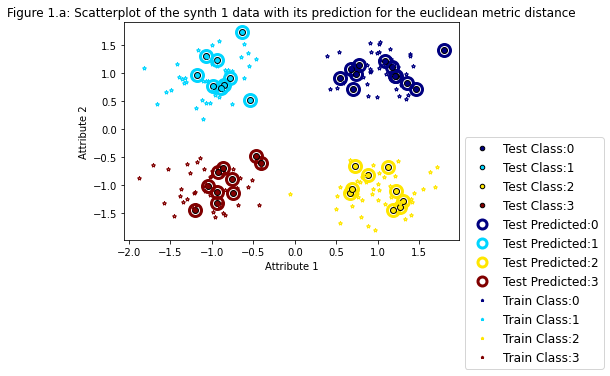

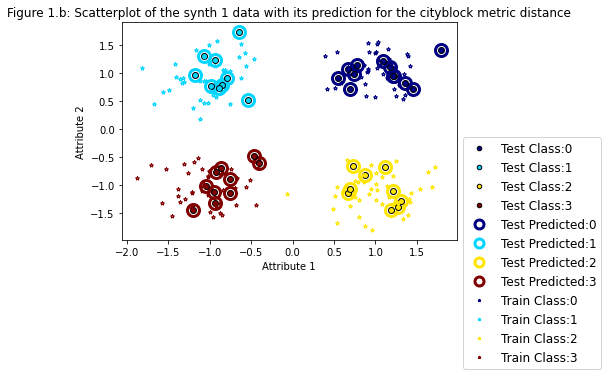

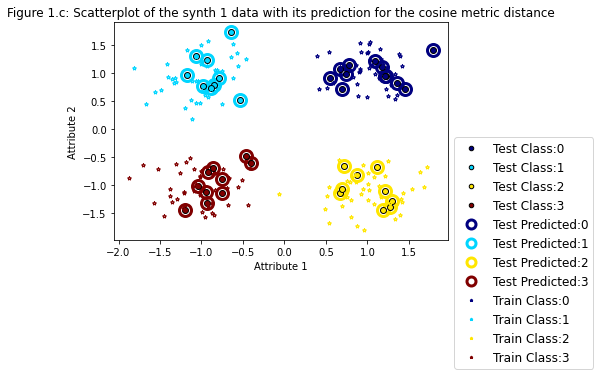

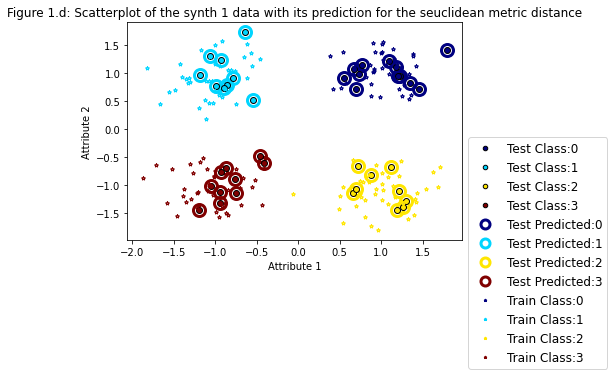

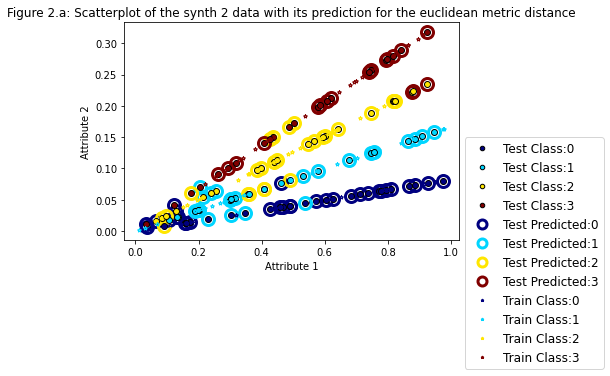

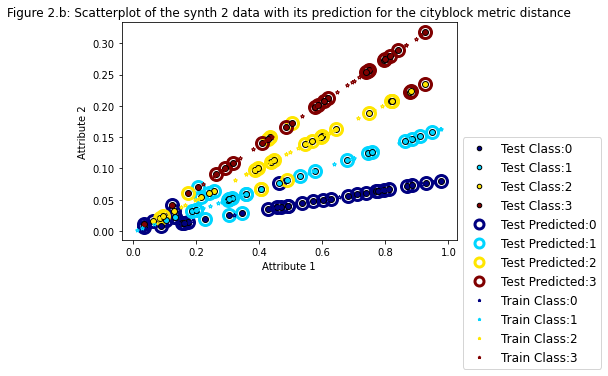

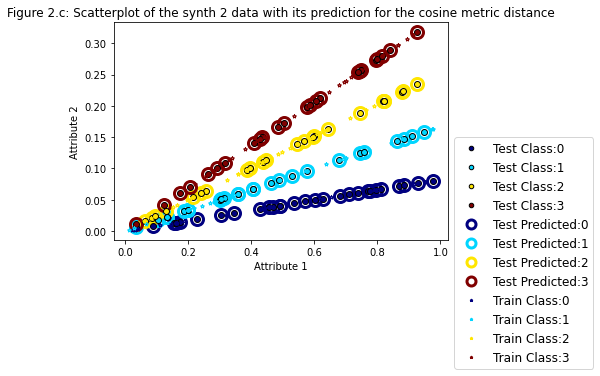

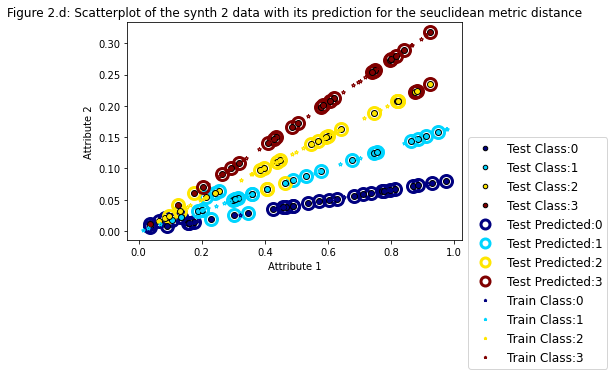

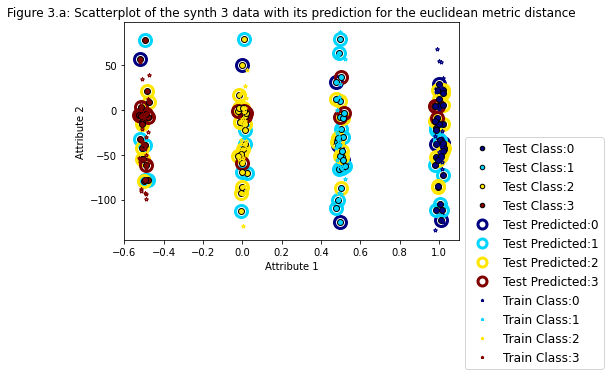

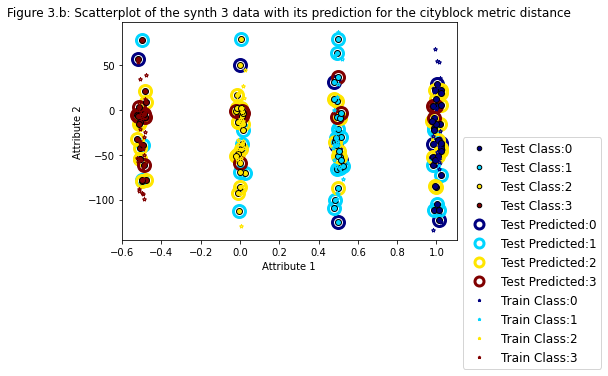

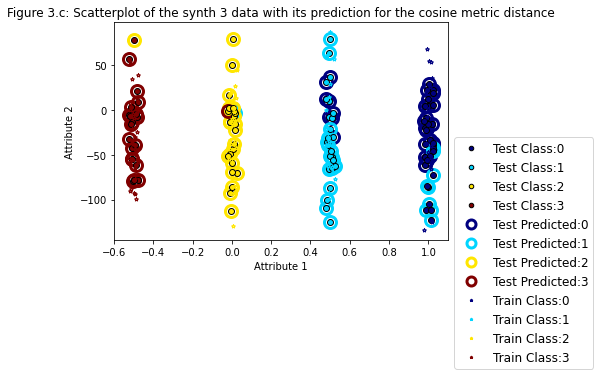

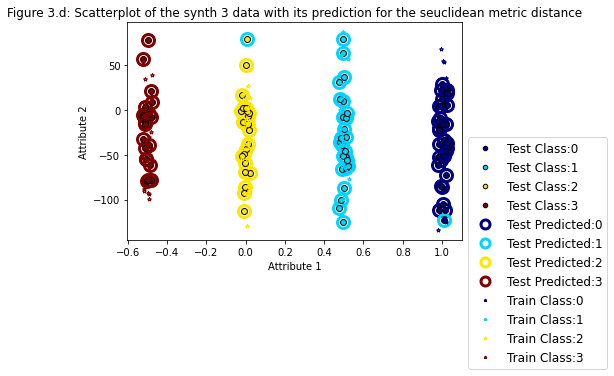

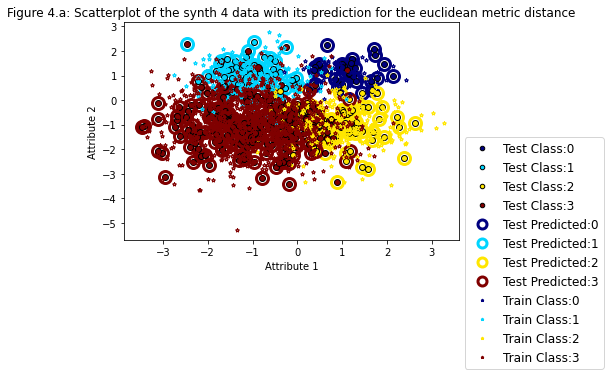

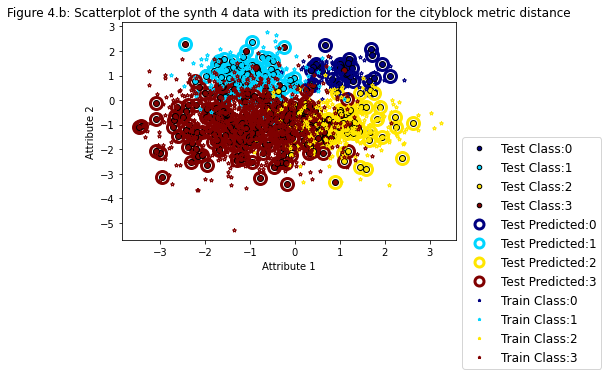

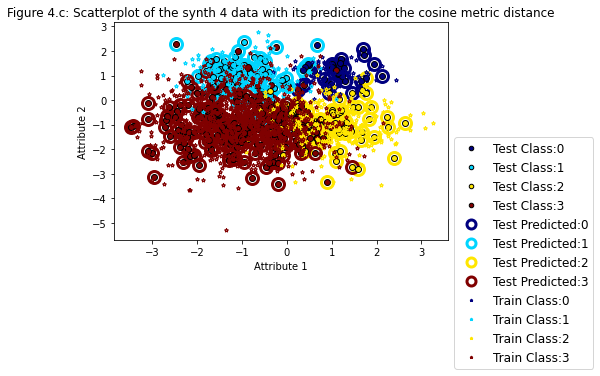

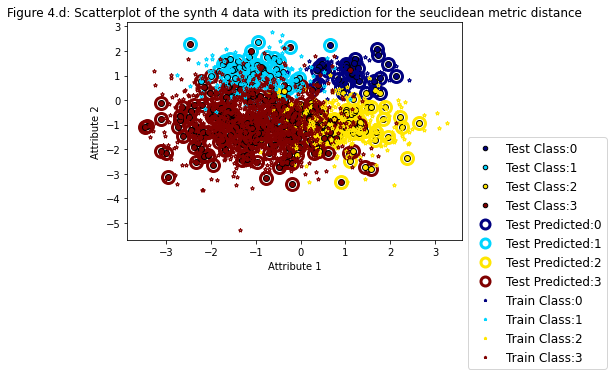

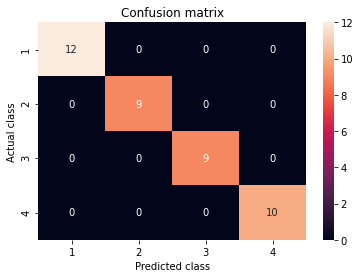

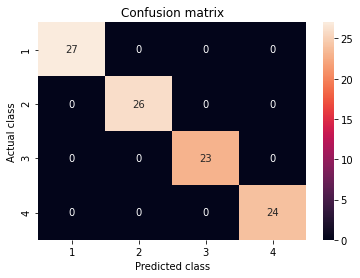

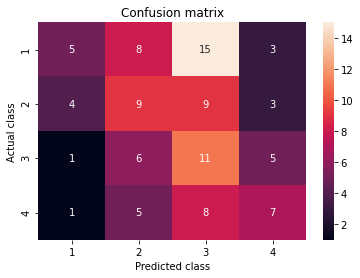

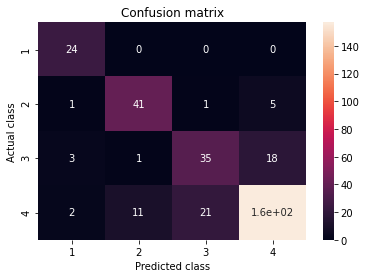

In [3]:
############CODE##################
##Answer to question 6.1.1
import scipy.io as scio
from sklearn.neighbors import KNeighborsClassifier
from toolbox.classification_plot import classification_plot
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Data Synth 1
data1 = scio.loadmat("./data/synth1.mat")

data1_X_test = data1["X_test"]
data1_X_train = data1["X_train"]
data1_y_test = data1["y_test"].ravel()
data1_y_train = data1["y_train"].ravel()

classifier1euclidean = KNeighborsClassifier(n_neighbors = 5, metric = 'euclidean')
classifier1euclidean.fit(data1_X_train, data1_y_train)
data1predictEuclidean = classifier1euclidean.predict(data1_X_test)

classifier1cityblock = KNeighborsClassifier(n_neighbors = 5, metric = 'cityblock')
classifier1cityblock.fit(data1_X_train, data1_y_train)
data1predictCityblock = classifier1cityblock.predict(data1_X_test)

classifier1cosine = KNeighborsClassifier(n_neighbors = 5, metric = 'cosine')
classifier1cosine.fit(data1_X_train, data1_y_train)
data1predictCosine = classifier1cosine.predict(data1_X_test)

dictionary1 = {'V': np.var(data1_X_train, axis = 0)}

classifier1seuclidean = KNeighborsClassifier(n_neighbors = 5, metric = 'seuclidean', metric_params = dictionary1)
classifier1seuclidean.fit(data1_X_train, data1_y_train)
data1predictSeuclidean = classifier1seuclidean.predict(data1_X_test)

classification_plot(data1_X_test, data1_y_test, data1predictEuclidean, data1_X_train, data1_y_train)
plt.title("Figure 1.a: Scatterplot of the synth 1 data with its prediction for the euclidean metric distance")
plt.xlabel("Attribute 1")
plt.ylabel("Attribute 2")
plt.show()

classification_plot(data1_X_test, data1_y_test, data1predictCityblock, data1_X_train, data1_y_train)
plt.title("Figure 1.b: Scatterplot of the synth 1 data with its prediction for the cityblock metric distance")
plt.xlabel("Attribute 1")
plt.ylabel("Attribute 2")
plt.show()

classification_plot(data1_X_test, data1_y_test, data1predictCosine, data1_X_train, data1_y_train)
plt.title("Figure 1.c: Scatterplot of the synth 1 data with its prediction for the cosine metric distance")
plt.xlabel("Attribute 1")
plt.ylabel("Attribute 2")
plt.show()

classification_plot(data1_X_test, data1_y_test, data1predictSeuclidean, data1_X_train, data1_y_train)
plt.title("Figure 1.d: Scatterplot of the synth 1 data with its prediction for the seuclidean metric distance")
plt.xlabel("Attribute 1")
plt.ylabel("Attribute 2")
plt.show()

#----------------------------------------------------------------------------------------------------------------
# Data Synth 2

data2 = scio.loadmat("./data/synth2.mat")

data2_X_test = data2["X_test"]
data2_X_train = data2["X_train"]
data2_y_test = data2["y_test"].ravel()
data2_y_train = data2["y_train"].ravel()

classifier2euclidean = KNeighborsClassifier(n_neighbors = 5, metric = 'euclidean')
classifier2euclidean.fit(data2_X_train, data2_y_train)
data2predictEuclidean = classifier2euclidean.predict(data2_X_test)

classifier2cityblock = KNeighborsClassifier(n_neighbors = 5, metric = 'cityblock')
classifier2cityblock.fit(data2_X_train, data2_y_train)
data2predictCityblock = classifier2cityblock.predict(data2_X_test)

classifier2cosine = KNeighborsClassifier(n_neighbors = 5, metric = 'cosine')
classifier2cosine.fit(data2_X_train, data2_y_train)
data2predictCosine = classifier2cosine.predict(data2_X_test)

dictionary2 = {'V': np.var(data2_X_train, axis = 0)}

classifier2seuclidean = KNeighborsClassifier(n_neighbors = 5, metric = 'seuclidean', metric_params = dictionary2)
classifier2seuclidean.fit(data2_X_train, data2_y_train)
data2predictSeuclidean = classifier2seuclidean.predict(data2_X_test)

classification_plot(data2_X_test, data2_y_test, data2predictEuclidean, data2_X_train, data2_y_train)
plt.title("Figure 2.a: Scatterplot of the synth 2 data with its prediction for the euclidean metric distance")
plt.xlabel("Attribute 1")
plt.ylabel("Attribute 2")
plt.show()

classification_plot(data2_X_test, data2_y_test, data2predictCityblock, data2_X_train, data2_y_train)
plt.title("Figure 2.b: Scatterplot of the synth 2 data with its prediction for the cityblock metric distance")
plt.xlabel("Attribute 1")
plt.ylabel("Attribute 2")
plt.show()

classification_plot(data2_X_test, data2_y_test, data2predictCosine, data2_X_train, data2_y_train)
plt.title("Figure 2.c: Scatterplot of the synth 2 data with its prediction for the cosine metric distance")
plt.xlabel("Attribute 1")
plt.ylabel("Attribute 2")
plt.show()

classification_plot(data2_X_test, data2_y_test, data2predictSeuclidean, data2_X_train, data2_y_train)
plt.title("Figure 2.d: Scatterplot of the synth 2 data with its prediction for the seuclidean metric distance")
plt.xlabel("Attribute 1")
plt.ylabel("Attribute 2")
plt.show()

#----------------------------------------------------------------------------------------------------------------
# Data Synth 3

data3 = scio.loadmat("./data/synth3.mat")

data3_X_test = data3["X_test"]
data3_X_train = data3["X_train"]
data3_y_test = data3["y_test"].ravel()
data3_y_train = data3["y_train"].ravel()

classifier3euclidean = KNeighborsClassifier(n_neighbors = 5, metric = 'euclidean')
classifier3euclidean.fit(data3_X_train, data3_y_train)
data3predictEuclidean = classifier3euclidean.predict(data3_X_test)

classifier3cityblock = KNeighborsClassifier(n_neighbors = 5, metric = 'cityblock')
classifier3cityblock.fit(data3_X_train, data3_y_train)
data3predictCityblock = classifier3cityblock.predict(data3_X_test)

classifier3cosine = KNeighborsClassifier(n_neighbors = 5, metric = 'cosine')
classifier3cosine.fit(data3_X_train, data3_y_train)
data3predictCosine = classifier3cosine.predict(data3_X_test)

dictionary3 = {'V': np.var(data3_X_train, axis = 0)}

classifier3seuclidean = KNeighborsClassifier(n_neighbors = 5, metric = 'seuclidean', metric_params = dictionary3)
classifier3seuclidean.fit(data3_X_train, data3_y_train)
data3predictSeuclidean = classifier3seuclidean.predict(data3_X_test)

classification_plot(data3_X_test, data3_y_test, data3predictEuclidean, data3_X_train, data3_y_train)
plt.title("Figure 3.a: Scatterplot of the synth 3 data with its prediction for the euclidean metric distance")
plt.xlabel("Attribute 1")
plt.ylabel("Attribute 2")
plt.show()

classification_plot(data3_X_test, data3_y_test, data3predictCityblock, data3_X_train, data3_y_train)
plt.title("Figure 3.b: Scatterplot of the synth 3 data with its prediction for the cityblock metric distance")
plt.xlabel("Attribute 1")
plt.ylabel("Attribute 2")
plt.show()

classification_plot(data3_X_test, data3_y_test, data3predictCosine, data3_X_train, data3_y_train)
plt.title("Figure 3.c: Scatterplot of the synth 3 data with its prediction for the cosine metric distance")
plt.xlabel("Attribute 1")
plt.ylabel("Attribute 2")
plt.show()

classification_plot(data3_X_test, data3_y_test, data3predictSeuclidean, data3_X_train, data3_y_train)
plt.title("Figure 3.d: Scatterplot of the synth 3 data with its prediction for the seuclidean metric distance")
plt.xlabel("Attribute 1")
plt.ylabel("Attribute 2")
plt.show()

#----------------------------------------------------------------------------------------------------------------
# Data Synth 4

data4 = scio.loadmat("./data/synth4.mat")

data4_X_test = data4["X_test"]
data4_X_train = data4["X_train"]
data4_y_test = data4["y_test"].ravel()
data4_y_train = data4["y_train"].ravel()

classifier4euclidean = KNeighborsClassifier(n_neighbors = 5, metric = 'euclidean')
classifier4euclidean.fit(data4_X_train, data4_y_train)
data4predictEuclidean = classifier4euclidean.predict(data4_X_test)

classifier4cityblock = KNeighborsClassifier(n_neighbors = 5, metric = 'cityblock')
classifier4cityblock.fit(data4_X_train, data4_y_train)
data4predictCityblock = classifier4cityblock.predict(data4_X_test)

classifier4cosine = KNeighborsClassifier(n_neighbors = 5, metric = 'cosine')
classifier4cosine.fit(data4_X_train, data4_y_train)
data4predictCosine = classifier4cosine.predict(data4_X_test)

dictionary4 = {'V': np.var(data2_X_train, axis = 0)}

classifier4seuclidean = KNeighborsClassifier(n_neighbors = 5, metric = 'seuclidean', metric_params = dictionary4)
classifier4seuclidean.fit(data4_X_train, data4_y_train)
data4predictSeuclidean = classifier4seuclidean.predict(data4_X_test)

classification_plot(data4_X_test, data4_y_test, data4predictEuclidean, data4_X_train, data4_y_train)
plt.title("Figure 4.a: Scatterplot of the synth 4 data with its prediction for the euclidean metric distance")
plt.xlabel("Attribute 1")
plt.ylabel("Attribute 2")
plt.show()

classification_plot(data4_X_test, data4_y_test, data4predictCityblock, data4_X_train, data4_y_train)
plt.title("Figure 4.b: Scatterplot of the synth 4 data with its prediction for the cityblock metric distance")
plt.xlabel("Attribute 1")
plt.ylabel("Attribute 2")
plt.show()

classification_plot(data4_X_test, data4_y_test, data4predictCosine, data4_X_train, data4_y_train)
plt.title("Figure 4.c: Scatterplot of the synth 4 data with its prediction for the cosine metric distance")
plt.xlabel("Attribute 1")
plt.ylabel("Attribute 2")
plt.show()

classification_plot(data4_X_test, data4_y_test, data4predictSeuclidean, data4_X_train, data4_y_train)
plt.title("Figure 4.d: Scatterplot of the synth 4 data with its prediction for the seuclidean metric distance")
plt.xlabel("Attribute 1")
plt.ylabel("Attribute 2")
plt.show()

#----------------------------------------------------------------------------------------------------------------
# Confusion Plot

# Data 1
cm1 = confusion_matrix(data1_y_test, data1predictEuclidean)
plot_confusion_matrix(cm1,data1_y_test)

# Data 2
cm2 = confusion_matrix(data2_y_test, data2predictCosine)
plot_confusion_matrix(cm2,data2_y_test)

# Data 3
cm3 = confusion_matrix(data3_y_test, data3predictEuclidean)
plot_confusion_matrix(cm3,data3_y_test)

# Data 4
cm4 = confusion_matrix(data4_y_test, data4predictEuclidean)
plot_confusion_matrix(cm4,data4_y_test)

For the first dataset all metrics give the same results. So, there is no one method that performs better than the others. For the second dataset the cosine metric gives the best result. From the graph it becomes clear that every point is classified in the correct class. The third dataset both the cosine metric and seuclidean distance perform better than the other two metrics. However, the seuclidean metric performs better than the cosine metric and thus is the best metric for this dataset. Lastly, for the fourth and last dataset, it is harder to see the differences between all the metrics. There is no one metric that clearly outperforms the others. But when you take a look at the confusion matrices it becomes visible that for all metrics the fourth class is the most predicted class. In all cases this equals 1.6e+02 (160). So to find the differences we are going ta take a look at the other classes. For this we take the sum of all incorrectly classified classes. Euclidean = 62, CityBlock = 59, Cosine = 58 and Seuclidean = 71. From this it becomes clear that the cosine metric is slighty more accurate than the others for this dataset.

The amount of neigbors is different for each dataset. For the first three sets 5 neigbors was fine, However this was not good enough for the last dataset. For this dataset a larger number of neighbors is needed

Whem clusters are well seperated it is enough to take a small number of neigbors. Each class is clearly seperated from the other classes, So, when a new datapoint is added and it is close to one point it is highly probable that both points belong to the same class. Thus a small number for the neighbors is easier. 

If you choose a bigger number of neigbors it can be the case that every neighbourhood contains multiple classes. This is because every point is compared to may others. However, a bigger number of neigbours is more suited for overlapping classes than a smaller number. This is because it is compared to many points instead of only the closest ones. When you are in a overlapping area for classes it becomes easier to correctly identify the class with a large number. 

#### 6.1.2 (1 points)
In general we can use cross-validation to select the optimal distance metric and number of nearest neighbors, k.This can however be computationally expensive. 

We now return to the Iris data that we have considered in previous exercises, and will attempt to classify the Iris flowers using KNN. 

* Load the Iris data into Python with the `pandas` function `read_excel()` and save it to a variable called `iris_data`. Inspect the data by printing the `head()` of the dataframe. 

* Use the values of the 4 variables `Sepal Length,  Sepal Width,  Petal Length,  Petal Width` to create a data set `X`. Use the `Type` column to create the labels `labels`. Both `X` should be a numpy array! You can use the `to_numpy()` method for this. `labels` will be a Pandas series.

* Convert the Pandas series `labels` to an integer encoding by using the `LabelEncoder` in scikit-learn. Save the integer encoding, which should be a numpy array to a variable called `y`.

* Use leave-one-out cross-validation to estimate the optimal number of neighbors, k, for the k-nearest neighbor classifier. Save the vector of averaged errors to a variable called `mean_errors`. This should be a numpy array.

* Plot the cross-validation average classification error as a function of k for $k = 1,..,40$.

You can use the function `LeaveOneOut` from `sklearn.model_selection`: http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.LeaveOneOut.html

What is the optimal number of neighbors to use for this data?

In [4]:
##Answer to question 6.1.2
# YOUR CODE HERE
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import accuracy_score
le = preprocessing.LabelEncoder()
iris_data = pd.read_excel("data/iris.xls")
X = iris_data[["Sepal Length", 'Sepal Width', 'Petal Length', 'Petal Width']].to_numpy()
labels = iris_data["Type"]
le.fit(labels)
y = le.transform(labels)
loo = LeaveOneOut()
loo.get_n_splits(X)
counter = 1
mean_errors = []
for k in range(1,40):
    errors = []
    for train_index, test_index in loo.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        neigh = KNeighborsClassifier(n_neighbors=k)
        neigh.fit(X_train, y_train)
        y_pred = neigh.predict(X_test)
        test_error = 1 - accuracy_score(y_test, y_pred, normalize=True)
        errors.append(test_error)
    mean_errors.append(np.mean(errors))

Figure 1:


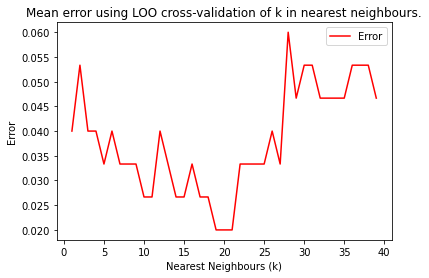

In [5]:
error_plot = plt.figure()
print("Figure 1:")
plt.plot(range(1,40), mean_errors, color='red', label='Error')
plt.ylabel('Error')
# Set the y axis label of the current axis.
plt.xlabel('Nearest Neighbours (k)')
# Set a title of the current axes.
plt.title('Mean error using LOO cross-validation of k in nearest neighbours.')
plt.legend()
plt.show()

In [6]:
"""Checks whether 6.1.2 output is correct"""
"""DO NOT MODIFY THIS CELL"""

'DO NOT MODIFY THIS CELL'

From the plot of Figure 1, k = 20 is evidently the best option with respect to mean errors.

#### 6.1.3 (2 points)

KNN can also be used for regression by predicting the output of an observation as the average of the output values of its nearest neighbors. 

KNN regression in Python is most easily performed using the `KNeighborsRegressor` in `sklearn.neighbors`. 

We'll predict the alcohol content of wine in the wine data with KNN, using the other 10 attributes as predictors. 

* Load the Wine data into Python and save it to a variable called `wine_data`.

* Construct the `X` and `y` numpy arrays by slicing the `wine_data`. `y` should be a vector containing only the alcohol percentage, the other variables should be contained in `X`.

* We will use the mean squared error as a performance metric. This can be calculated using `mean_squared_error` in `sklearn.metrics`.

* Use k-fold cross-validation with k=5 to estimate the optimal number of neighbors, k, for the k-nearest neighbor classifier. Save the vector of averaged errors to a variable called `mean_errors`. This should be a numpy array. **N.B.** This means you will have a mean of mean squared errors for each value of k.

* The cross-validation procedure should be performed using `KFold` in `sklearn.model_selection`. The variable `random_state` **must** be set to a value of `42`. The variable `shuffle` must be set to `True`.

* Plot the calculated cross-validation averaged mean square error as a function of k for $k = 1,..,40$.

* Repeat all these steps, but perform standardization during the procedure. Make sure the mean and standard deviation are calculated over **only** the train data, and applied on both train and the test data. You can use the `StandardScaler` in `sklearn.preprocessing` for this. Save the errors to `mean_errors_std` using the same methodology as for `mean_errors`.

Then answer the following questions:
* What is the optimal value for the number of nearest neighbors? Answer for both the preprocessing procedures (no preprocessing and standardization).

* Does the algorithm perform better with or without standardization? Explain your observations.

* Why do we need to calculate the mean and standard deviation on the training data rather than over the entire data?

In [7]:
##Answer to question 6.1.3
# YOUR CODE HERE
import scipy.io as scio
from sklearn.metrics import mean_squared_error
wine_data = scio.loadmat("data/wine.mat")
x = wine_data['X']
y = wine_data['y'].ravel()
attribute_names = [x[0] for x in wine_data['attributeNames'].ravel()]
y = x[:,10]
X = x[:,0:10]

In [8]:
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsRegressor
kf = KFold(n_splits=5, random_state=42, shuffle=True)
depths = range(1,40)
def validate(scale=False):
    mean_errors = []
    for k in depths:
        errors = []
        for train_i, test_i in kf.split(X):
            kfold_reg = KNeighborsRegressor(k)
            X_train = X[train_i]
            X_test = X[test_i]
            y_train = y[train_i]
            y_test = y[test_i]
            if scale:
                scaler = preprocessing.StandardScaler()
                scaler = scaler.fit(X_train)
                X_train = scaler.transform(X_train)
                X_test = scaler.transform(X_test)
            kfold_reg = kfold_reg.fit(X_train, y_train)
            errors.append(mean_squared_error(kfold_reg.predict(X_test), y_test))
        mean_errors.append(np.mean(errors))
    return mean_errors

In [9]:
def plot(depths, mean_errors):
    plt.figure()
    plt.plot(depths, mean_errors, color='red', label='Mean of mean squared errors versus nearest neighbors (k)')
    plt.ylabel('Mean of mean squared error')
    # Set the y axis label of the current axis.
    plt.xlabel('Nearest neighbors (k)')
    # Set a title of the current axes.
    plt.title('Mean of squared error using 5Fold split and varying nearest neighbors')
    plt.legend()
    plt.show()

Figure 2: Default plot


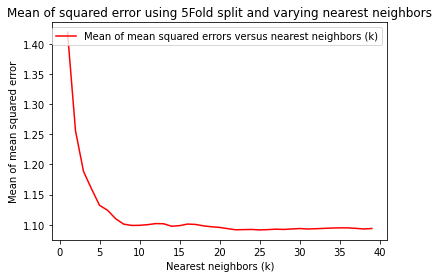

Figure 3: Standardized data


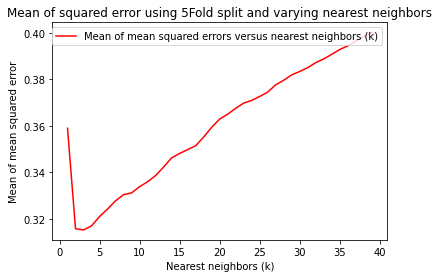

In [10]:
print("Figure 2: Default plot")
plot(depths, validate())
print("Figure 3: Standardized data")
plot(depths, validate(scale=True))

In [11]:
"""Checks whether 6.1.2 output is correct"""
"""DO NOT MODIFY THIS CELL"""

'DO NOT MODIFY THIS CELL'

- What is the optimal value for the number of nearest neighbors? Answer for both the preprocessing procedures (no preprocessing and standardization).

For no preprocessing, a value for nearest neighbours > 10 seems best, as from then on the mean of mean errors is ~1.10. As for standardization, it seems k in {2,3,4} seems optimal for this classification problem.

- Does the algorithm perform better with or without standardization? Explain your observations.

With standardization the mean of mean squared errors is generally lower, so standardization seems to improve classification results.

- Why do we need to calculate the mean and standard deviation on the training data rather than over the entire data?

Testing data should be seperate from model creation, i.e. for testing only, if you were to construct a proper classification model. 

## 6.2 Artificial Neural Networks

In this part of the exercise we will use neural networks to classify the xor data. We will consider a network with an input layer, one layer of hidden units and an output layer. The class `sklearn.neural_network.MLPClassifier` can be used to create a Multilayer Perceptron that can minimizes the Cross-Entropy loss function for any dataset X with corresponding labels y. See https://scikit-learn.org/stable/modules/neural_networks_supervised.html 

We use the data contained in `xor.mat` in the Data folder. 

#### 6.2.1 (0.5 points)
Check out the documentation for `MLPClassifier` and read the documentation well. Make sure you understand at least in general terms how the learning process works. Answer the following questions before you continue:

1. For a single perceptron, the activation function can be linear, e.g. $f(x) = x$. However, the activation function used in the MLP class is a non-linear function. Why does it not make sense for a MLP to use such a linear activation function? Hint: what does the following computation simplify to if $f(x)$ is such a simple linear function: $f(Wo*f(Wh*X_i))$?
2. The MLPClassifier has a few optional parameters. For each of the following parameters, explain how changing the parameter might affect the learning process or the resulting solution:

> `hidden_layer_sizes`:

> `max_iter`:

> `learning_rate`:

> `learning_rate_init`:

   3\. Use the following commands to create a small test set:

> `Xtest = np.array([[0,0],[0,1],[1,0],[1,1]]).`

> `ytest = np.array([0,0,0,1])`
     

Create a MLPClassifier with 1 hidden layer using the `lbfgs`solver and fit the data. You can leave the other parameters unchanged. Use the score method to compute the mean accuracy. How well does the MLP perform on this problem? Use the function `MLPPlot.plot_boundaries` function to plot the data and the decision boundaries. Why does(n't) it work well with one hidden unit? Could you improve by using more?

#### NB: the weights are initialised randomly, so you should run the code a few times untill you get a decent result.

Score: 1.0


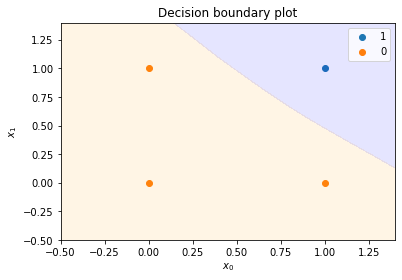

In [12]:
##Answer to question 6.2.1
# YOUR CODE HERE
from sklearn.neural_network import MLPClassifier
from toolbox import MLPPlot
Xtest = np.array([[0,0],[0,1],[1,0],[1,1]])
ytest = np.array([0,0,0,1])
mlp = MLPClassifier(solver='lbfgs')
mlp = mlp.fit(Xtest, ytest)
ypred = mlp.predict(Xtest)
print("Score: " + str(mlp.score(Xtest, ytest)))
plotter = MLPPlot.MLPPlot(Xtest,ytest,mlp)
plotter.plot_boundaries()

6.2.1.1: If the activation function would be a linear function of the from f(x) = x then the function f(Wo * f(Wh Xi)) would translate to Wo * Wh * Xi, which would just be a linear scale of the bias parameters to the input features.

6.2.1.2: 

hidden_layer_sizes: the number of hidden layers and associated neurens per layer. More hidden layers makes the learning process more complex but might result in overfitting.
    
max_iter: the algorithm stops until it converges or this number is hit, you can try to force convergance by upping this paramters.
    
learning_rate: schedule for when weight updates are done.

learning_rate_init: initial learning rate, used throughout if learning_rate is set to constant.

6.2.1.3:

It works perfectly because it is fit and predicting on the same data, as evident by the score of 1.0. As for the decision boundary, it seems a single layer on such a small dataset makes a pretty broad layer for the classification of the 1 label.

#### 6.2.2 (0.5 points)
Load the data from `xor.mat` into Python using `scipio.io.loadmat(...)` and make `y` a 1d vector. Make a scatter plot of the two attributes in `X`, coloring the points according to the class labels `y` and add a legend. Use matplotlib functions, and no toolbox functions for this. How are `X` and `y` related?

In [13]:
##Answer to question 6.2.2
# YOUR CODE HERE
import matplotlib
import matplotlib.pyplot as plt
import scipy
xor = scipy.io.loadmat("data/xor.mat")
y = xor['y'].ravel()
X = xor['X']
X0 = X[:,0]
X1 = X[:,1]

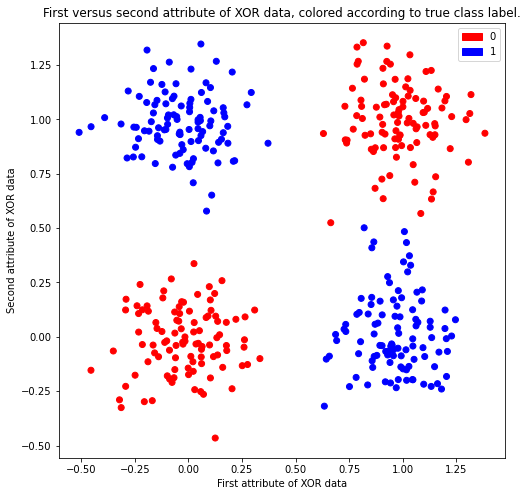

In [14]:
colors = ['red', 'blue']

fig = plt.figure(figsize=(8,8))
plt.scatter(X0, X1, c=y, cmap=matplotlib.colors.ListedColormap(colors), label=colors)
loc = np.arange(0,max(y),max(y)/float(len(colors)))
plt.xlabel("First attribute of XOR data")
plt.ylabel("Second attribute of XOR data")
plt.title("First versus second attribute of XOR data, colored according to true class label.")

red_patch = matplotlib.patches.Patch(color='red', label='0')
blue_patch = matplotlib.patches.Patch(color='blue', label='1')

plt.legend(handles=[red_patch, blue_patch])

plt.show()

The data is split diagonally in two clusters, so there are four clusters from the data from which they relate diagonally.

#### 6.2.3 (2 points)
Create a MLPClassifier with 1 hidden unit. Fit X and y. Use 10-fold cross-validation `KFold` from `sklearn.model_selection` to create training and test sets and estimate the classification error for both. In each fold, run the learning process 5 times and take the best classification error.  

Plot the decision boundaries of one network trained on the entire data set, again with 1 hidden unit, and explain why the network performs so well/poorly.

In [15]:
##Answer to question 6.2.3
# YOUR CODE HERE
def kfold_mlp(layers):
    kfold = KFold(n_splits=10, shuffle=True, random_state=42)
    errors = []
    counter = 0
    for train, test in kfold.split(X):
        X_train, X_test = X[train], X[test]
        y_train, y_test = y[train], y[test]
        test_error = 1
        for _ in range(4):
            clf = MLPClassifier(solver='lbfgs', hidden_layer_sizes=layers)
            clf = clf.fit(X_train, y_train)
            y_pred = clf.predict(X_test)
            acc = accuracy_score(y_test, y_pred, normalize=True)
            if (1 - acc) < test_error:
                test_error = 1 - acc 
            counter += 1
        errors.append(test_error)
    mlpc = MLPClassifier(solver='lbfgs', hidden_layer_sizes=layers)
    mlpc = mlpc.fit(X, y)
    mlpplot = MLPPlot.MLPPlot(X,y,mlpc)
    mlpplot.plot_boundaries()
    assert counter == 40
    print(np.mean(test_error))

In [16]:
neurons = 100

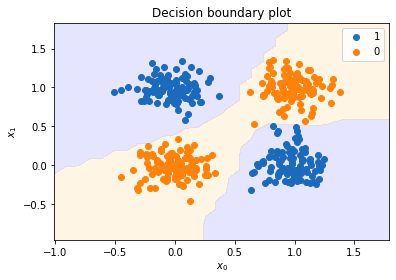

0.0


In [17]:
kfold_mlp((neurons,))

The optimal classification error results in a value of 0, so there is an optimal classification in the five iterations that is "perfect" for this specific data. The MLP classifier generally works pretty well, even using only one hidden layer. It does seem to mistake an orange value (0) in the blue (1) classification boundary.

#### 6.2.4 (1 point)
Repeat 6.2.3, but use two hidden units instead of one. Does the classification performance improve? Can you explain why?

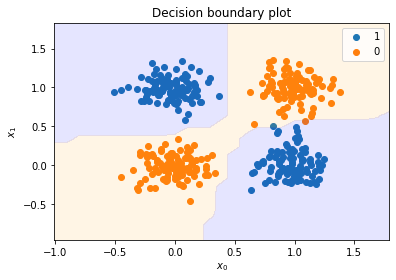

0.0


In [18]:
##Answer to question 6.2.4
# YOUR CODE HERE
kfold_mlp((neurons,neurons))

The diagonal split becomes more evident with two hidden layer. However, sometimes (depending on random weights) there are some orange (0) data points that have overlap in blue (1). 

#### 6.2.5 (1 point)
Repeat 6.2.3 with 10 hidden units. What happens to the decision boundaries of the learned neural networks? What are the benefits and drawbacks of including
many hidden units in the network?

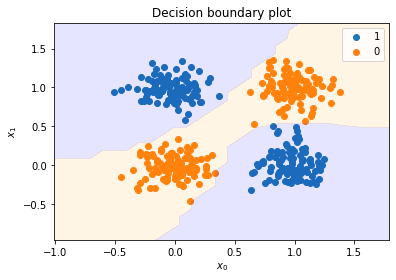

0.0


In [20]:
##Answer to question 6.2.5
# YOUR CODE HERE
kfold_mlp((neurons,neurons,neurons,neurons,neurons,neurons,neurons,neurons,neurons,neurons))

One evident drawback is the increased computation time, which is quite big. Using this many hidden layers seem to overfit to the data a bit.